In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# import seaborn as sns
import numpy as np

In [2]:
# dataset = 'GMM'
# path_apg = '/home/hao/Research/amortized/%s/experiments/' % dataset
# path_lstm = '/home/hao/Research/amortized/%s/experiments/' % dataset
# # path_vae = '/home/hao/Research/amortized/%s/aistats/vae/' % dataset
# KLs = []
# LLs_apg = []
# LLs_lstm = []
# LLs_vae = []
# ESSs_lstm = []
# for i in range(5):
# #     kl_ex = np.load(path_apg + 'data_%d-kl_ex.npy' % i)
#     ll_apg = np.load(path_apg + 'granular_%d-log_joint.npy' % ((i+1)*20))
#     ll_lstm = np.load(path_lstm + 'lstm_%d-ll.npy' % ((i+1)*20))
# #     ll_vae = np.load(path_vae + 'data_%d-ll.npy' % i)
#     ess_lstm = np.load(path_lstm + 'data_%d-ess.npy' % i)
#     LLs_apg.append(ll_apg)
#     LLs_lstm.append(ll_lstm)
# #     LLs_vae.append(ll_vae)
# #     ESSs_lstm.append(ess_lstm)
# #     ESSs.append(ess)
# #     KLs.append(kl_ex)
# LLs_apg = np.concatenate(LLs_apg, 0)
# LLs_lstm = np.concatenate(LLs_lstm, 0)
# # LLs_vae = np.concatenate(LLs_vae, 0)
# # ESSs_lstm = np.concatenate(ESSs_lstm, 0)
# # KLs = np.concatenate(KLs, 0)

# (LLs_apg[:, 6] - LLs_apg[:, 0]).mean()
# # for i in range(20):
# #     if i == 0 or i == 5 or i ==10 or i == 15:
# #         print('step=%d, KL=%.6f' % (i, (KLs[:, i]).mean()))

In [3]:
path_mse = '/home/hao/Research/amortized/Bouncing-MNIST/experiment/mse/'

In [33]:
T = [20, 100]
D = [3,4,5]
MSEs_mean = []
MSEs_std = []
for t in T:
    for d in D:
        msetd = np.load(path_mse + 'mse-T=%d-D=%d.npy' % (t, d)) / 9216.
        mean = msetd.mean(0)
        std = np.std(msetd, 0)
        MSEs_mean.append(mean[None, :])
        MSEs_std.append(std[None, :])
MSEs_mean = np.concatenate(MSEs_mean, 0)
MSEs_std = np.concatenate(MSEs_std, 0)
a = MSEs_mean[-1,:].copy()
aa = MSEs_mean[-2,:].copy()
MSEs_mean[-1,:-1] = aa[1:]
MSEs_mean[-2,:] = a

b= MSEs_std[-1,:].copy()
bb = MSEs_std[-2,:].copy()
MSEs_std[-1,:-1] = bb[1:]
MSEs_std[-2,:] = b

In [34]:
MSEs_mean

array([[0.01239081, 0.00821408, 0.00656432, 0.00592416, 0.00566568,
        0.00552302, 0.00543413, 0.00538045, 0.00536034, 0.00534747,
        0.00534752],
       [0.01991703, 0.01358176, 0.01010013, 0.00916002, 0.00868383,
        0.00837179, 0.00816642, 0.00799385, 0.00788938, 0.00781375,
        0.00775619],
       [0.03174516, 0.02061084, 0.01577146, 0.01417841, 0.01331314,
        0.01255354, 0.01193967, 0.01154856, 0.01132187, 0.01118484,
        0.01110086],
       [0.0135728 , 0.00637164, 0.00555428, 0.00527788, 0.00519659,
        0.00518486, 0.00517678, 0.00516687, 0.00515973, 0.00515547,
        0.00515104],
       [0.02803104, 0.01674621, 0.00939181, 0.00683519, 0.00630786,
        0.00619115, 0.00612843, 0.00608444, 0.00604785, 0.00602443,
        0.00601215],
       [0.02681493, 0.02354889, 0.02090716, 0.01835731, 0.01585039,
        0.01406214, 0.01252355, 0.01124531, 0.01029383, 0.00967441,
        0.00601215]], dtype=float32)

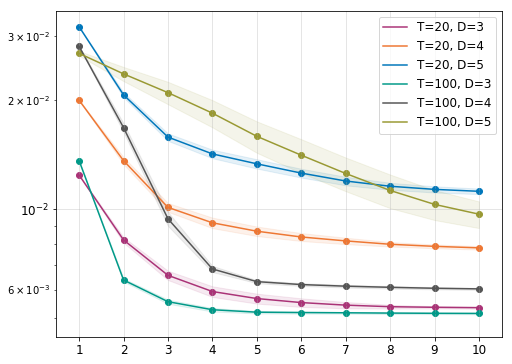

In [53]:
labels = ['T=20, D=3', 'T=20, D=4', 'T=20, D=5','T=100, D=3','T=100, D=4', 'T=100, D=5']
COLORS = ['#AA3377', '#EE7733', '#0077BB', '#009988', '#555555', '#999933']
t = np.arange(10)+1
OPACITY = 0.1
factor = 0.5
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for i in range(6):
    ax.plot(t , MSEs_mean[i][:-1], color=COLORS[i], label=labels[i])
    ax.scatter(t , MSEs_mean[i][:-1], color=COLORS[i])
    ax.fill_between(t, MSEs_mean[i][:-1]-MSEs_std[i][:-1]*factor, MSEs_mean[i][:-1]+MSEs_std[i][:-1]*factor, color=COLORS[i], alpha=OPACITY)

ax.legend(fontsize=12)
# ax.set_xlabel('APG Updates')
ax.set_yscale('log')
TITLE_FS = 12
ax.tick_params(axis="x", labelsize=TITLE_FS)
ax.tick_params(axis="y", labelsize=TITLE_FS)
# ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' '10'])
ax.set_xticks(np.arange(1, 11, 1))
ax.grid(alpha=0.4)
plt.savefig('mse.svg', dpi=300)


In [ ]:
np.std(MSEs[i], 0)

In [ ]:
path_gmm = '/home/hao/Research/amortized/GMM/aistats/'
ess_gmm = np.load(path_gmm + 'budget-ess.npy')
log_joint_gmm = np.load(path_gmm + 'budget-log-joint.npy')

path_rings = '/home/hao/Research/amortized/Rings/aistats/'

ess_rings = np.load(path_rings + 'budget-ess.npy')
log_joint_rings = np.load(path_rings + 'budget-log-joint.npy')
log_joint_rings[:,1,-1] = log_joint_rings[:,1,-1] - 500
ess_rings = ess_rings * 0.75

In [ ]:
FS = 10
TITLE_FS = 14
OPACITY = 0.1
MS = 50
num_rows = 2
num_cols = 2
std_factor = 0.4
grid_alpha=0.5
t= np.arange(log_joint_gmm.shape[1])
gs = gridspec.GridSpec(num_rows, num_cols)
gs.update(left=0.05 , bottom=0.05, right=0.95, top=0.98, wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(FS*1.5, FS * num_rows / num_cols))
COLORS = ['#AA3377', '#EE7733', '#0077BB', '#009988', '#555555']
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
for c in range(5):
    data_ind = c
    ax1.plot(t, log_joint_gmm.mean(0)[:, data_ind], c=COLORS[c])
    ax1.scatter(t, log_joint_gmm.mean(0)[:, data_ind], c=COLORS[c], marker='o',s=MS, label='GMM, N=%d' % ((data_ind+1)*20))
    std_ll = np.std(log_joint_gmm[:,:, data_ind], 0)
    ax1.fill_between(t, log_joint_gmm.mean(0)[:, data_ind]-std_ll, log_joint_gmm.mean(0)[:, data_ind]+std_ll, color=COLORS[c], alpha=OPACITY)
    ## ESS
    ax2.plot(t, ess_gmm.mean(0)[:, data_ind], c=COLORS[c])
    ax2.scatter(t, ess_gmm.mean(0)[:, data_ind], c=COLORS[c], marker='o', s=MS, label='GMM, N=%d' % ((data_ind+1)*20))
    std_ess = np.std(ess_gmm[:,:,data_ind], 0)
    ax2.fill_between(t, ess_gmm.mean(0)[:, data_ind]-std_ess*std_factor, ess_gmm.mean(0)[:, data_ind]+std_ess*std_factor, color=COLORS[c], alpha=OPACITY)
ax1.grid(alpha=grid_alpha)
ax2.grid(alpha=grid_alpha)
ax2.set_ylim([-0.1, 1.1])
# ax1.set_xticks([])

ax1.legend(fontsize=TITLE_FS)
ax2.legend(fontsize=TITLE_FS)
ax1.set_xticklabels(['', '', '', '', '', '', '', '', ''])
ax2.set_xticklabels(['0','L=1000\nK=1', 'L=500\nK=2', 'L=200\nK=5', 'L=100\nK=10', 'L=50\nK=20', 'L=20\nK=50', 'L=10\nK=100', 'L=5\nK=200'])
ax1.tick_params(axis="x", labelsize=TITLE_FS)
ax2.tick_params(axis="x", labelsize=TITLE_FS)
ax1.tick_params(axis="y", labelsize=TITLE_FS)
ax2.tick_params(axis="y", labelsize=TITLE_FS)

ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
rings_pts = [120, 160, 200, 400, 600]
for c in range(5):
    data_ind = c 
    ax1.plot(t, log_joint_rings.mean(0)[:, data_ind], c=COLORS[c])
    ax1.scatter(t, log_joint_rings.mean(0)[:, data_ind], c=COLORS[c], marker='o',s=MS, label='DGMM, N=%d' % (rings_pts[c]))
    std_ll = np.std(log_joint_rings[:,:, data_ind], 0)
    ax1.fill_between(t, log_joint_rings.mean(0)[:, data_ind]-std_ll, log_joint_rings.mean(0)[:, data_ind]+std_ll, color=COLORS[c], alpha=OPACITY)
    ## ESS
    ax2.plot(t, ess_rings.mean(0)[:, data_ind], c=COLORS[c])
    ax2.scatter(t, ess_rings.mean(0)[:, data_ind], c=COLORS[c], marker='o', s=MS, label='DGMM, N=%d' % (rings_pts[c]))
    std_ess = np.std(ess_rings[:,:,data_ind], 0)
    ax2.fill_between(t, ess_rings.mean(0)[:, data_ind]-std_ess, ess_rings.mean(0)[:, data_ind]+std_ess, color=COLORS[c], alpha=OPACITY)
ax1.grid(alpha=grid_alpha)
ax2.grid(alpha=grid_alpha)
ax2.set_ylim([-0.1, 1.1])
ax1.legend(fontsize=TITLE_FS)
ax2.legend(fontsize=TITLE_FS)
ax1.set_xticklabels(['', '', '', '', '', '', '', '', ''])
ax2.set_xticklabels(['0','L=1000\nK=1', 'L=500\nK=2', 'L=200\nK=5', 'L=100\nK=10', 'L=50\nK=20', 'L=20\nK=50', 'L=10\nK=100', 'L=5\nK=200'])
ax1.tick_params(axis="x", labelsize=TITLE_FS)
ax2.tick_params(axis="x", labelsize=TITLE_FS)
ax1.tick_params(axis="y", labelsize=TITLE_FS)
ax2.tick_params(axis="y", labelsize=TITLE_FS)
plt.savefig('both-budget-dot.pdf', dpi=300)
plt.savefig('both-budget-dot.svg', dpi=300)

In [ ]:
std_ess